In [1]:
# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Libraries

import os
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Path to data
RESDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"
DATA =  RESDIR+"SUMMARY/Merged_Causality_best_tissue.table"
BASEDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"
SNPS = "/storage/szfeupe/Runs/GTEx_estr/SNP_Analysis"
STRS = "/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/"
COLOR = ['b', 'r', 'g', 'k', 'y', 'm', 'grey']

Gene_table = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/FEATURES/Genes_only_table', sep='\t')

def plotthat(Frame, BASEDIR, start=None):
    chs = list(Frame['chrom'])[0]
    gene = list(Frame['gene'])[0]
    if start is None: start = list(Frame['best.str.start'])[0]
    tissue = list(Frame['best.tissue'])[0]
    print(tissue)
    score = list(Frame['best.score'])[0]
    
    snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues.txt", sep="\t",low_memory=False)
    expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
    snp =pd.read_csv(SNPS+"/SNP_raw_gt_"+chs, sep='\t',low_memory=False) #snps
    Genos=pd.read_csv(STRS+"STR_Raw_Gen."+chs, sep='\t',low_memory=False)
    #gene name
    S = snps.loc[snps['gene']==gene]['str.start']; S=int(S)
    Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]
    print('\n----->',chs,' gene ',gene,'(',Gene,')  Causality Score: ',score,'\nCounts by SNP genotypes')
    
    #restrict to samples
    samples = list(expr.index)
    Genosnp = snp.loc[snp['start']==S,samples]
    print("SNP %s"%S)
    Genostr = Genos.loc[Genos['start']==start, samples]
    Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)
    Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
    #Expression
    Expr = expr[gene]
    
    #Figure    (1) SNP vs EXPR
    plt.figure(figsize=(11,3))
    plt.subplot(131)
    plt.title(tissue+' tissue')
    plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
    plt.ylabel(Gene+' expression')
    plt.xlabel('Best SNP genotypes')
    
    #Figure (2) STR vs. expr
    plt.subplot(132)
    plt.scatter(Genostr, Expr,label='eSTR', color='k',marker='.')
    #plt.ylabel(Gene+' Gene expression')
    print(int(start))
    #plt.xlabel('eSTR genotypes \nSTR_'+str(int(start)))
    
    df = pd.DataFrame({"expr":list(Expr), "snp":list(Genosnp.iloc[0,:]), "str": list(Genostr.iloc[0,:])})
    df.to_csv("%s.tab"%Gene)

    #Figure (3) Hold snp genotypes constant
    geno=list(set(Genosnp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno) ; N=0
    ind=Genosnp.index[0]
    #fig = plt.figure(figsize=(8,6))
    plt.subplot(133) #
    for i in range(n):
        S = Genosnp.T.loc[Genosnp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=Expr.loc[sample]
        S['Str']=Genostr.T.loc[sample][Genostr.index[0]]
        #print(N, list(S['Str']))
        S['Str'] = S['Str'].astype(float)
        #S['Str']+=N
        if len(S['Exp'])==0:
            continue
        #ax = fig.add_subplot(n,1,1+i)
        print(geno[i], S.shape)
        plt.scatter(list(S['Str']), list(S['Exp']), color=COLOR[i], marker='.')
#        plt.title.set_text(Gene+' Expression @ SNP_genotype='+str(geno[i])+' ( n='+str(len(S['Exp']))+' )')
        if max(list(S['Str'].values))-min(list(S['Str'].values))!=0:
            N += max(list(S['Str'].values))-min(list(S['Str'].values))+20
        else:
            N +=max(list(S['Str'].values))+20
        #print(N, list(S['Str']))
    #plt.xlabel('STRs at SNPs genotypes \nSTR_'+str(int(start)))
    plt.xticks([])
    plt.show()
    #plt.savefig("example_locus.pdf")

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


Adipose-Subcutaneous

-----> chr10  gene  ENSG00000148848.10 ( ADAM12 )  Causality Score:  0.0190188196063 
Counts by SNP genotypes
SNP 128144858
127865612
1 (15, 3)
0 (86, 3)


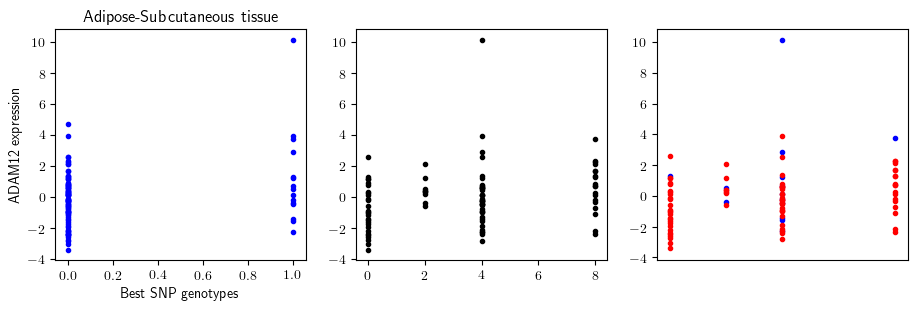

In [3]:
Data = pd.read_csv(DATA, sep='\t')
#G = "ENSG00000160213.5" # CSTB
G = "ENSG00000148848.10" # ADAM12
start=None
#G = "ENSG00000100852.8" # ARHGAP5
#G = "ENSG00000051825.10" # MPHOSPH9
#G = "ENSG00000241635.3" # UTGA1
#start=234668880
data = Data.loc[Data['gene']==G]
plotthat(data, BASEDIR, start=start)